In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head(10)

,Unnamed: 0,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99$,97,2,27 years,...,2,2,2,2,2,2,2,2,1,97
1,1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24 years,...,2,2,2,2,2,2,2,99,1,97
2,2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54 years,...,2,2,2,2,1,2,2,99,1,2
3,3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30 years,...,2,2,2,2,2,2,2,99,1,2
4,4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60 years,...,2,1,2,1,2,2,2,99,1,2
5,5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47 years,...,2,2,2,2,2,2,2,99,1,1
6,6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63 years,...,2,1,2,2,2,2,2,99,1,2
7,7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99$,97,2,56 years,...,2,1,2,2,2,1,1,1,1,97
8,8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99$,97,2,41 years,...,2,2,2,2,2,2,2,99,1,97
9,9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39 years,...,2,2,2,2,1,2,2,99,1,2


In [ ]:
print("No. of patients in dataset :" + str(len(df)))

No. of patients in dataset :396621


In [ ]:
df = df.replace([97, 98, 99], [np.nan for i in range(3)])
df = df.dropna()

In [ ]:
df['Death'] = df["date_died"].apply(lambda x:0
                                   if(x == "9999-99-99" or x == "9999-99-99$")
                                   else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['age_new'] = df.age.str[:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.drop(["Unnamed: 0", "id", "date_died", "age", "date_symptoms", "entry_date"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head(5)

,sex,patient_type,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Death,age_new
21,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0,25
30,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0,52
71,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0,51
79,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,0,67
93,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0,59


In [ ]:
df["age_new"]=pd.to_numeric(df["age_new"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17263 entries, 21 to 396520
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  17263 non-null  float64
 1   patient_type         17263 non-null  float64
 2   intubed              17263 non-null  float64
 3   pneumonia            17263 non-null  float64
 4   pregnancy            17263 non-null  float64
 5   diabetes             17263 non-null  float64
 6   copd                 17263 non-null  float64
 7   asthma               17263 non-null  float64
 8   inmsupr              17263 non-null  float64
 9   hypertension         17263 non-null  float64
 10  other_disease        17263 non-null  float64
 11  cardiovascular       17263 non-null  float64
 12  obesity              17263 non-null  float64
 13  renal_chronic        17263 non-null  float64
 14  tobacco              17263 non-null  float64
 15  contact_other_covid  17263 non-nul

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Data Visualisation**

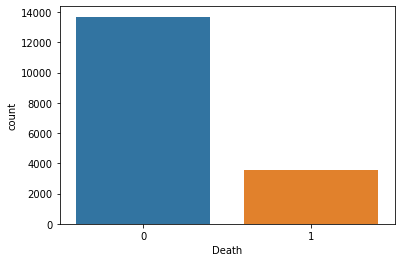

In [ ]:
sns.countplot(x='Death',data=df)
plt.show()

In [ ]:
df.isnull()

,sex,patient_type,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Death,age_new
21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396189,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396311,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396362,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

sex                    0
patient_type           0
intubed                0
pneumonia              0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
Death                  0
age_new                0
dtype: int64

In [ ]:
df2=pd.read_csv('test.csv')
df2.head()

,Unnamed: 0,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,396621,183094,1,1,27-03-2020,27-03-2020,9999-99-99,97,2,55 years,...,2,2,2,2,2,2,2,1,2,97
1,396622,1b558f,1,1,07-04-2020,05-04-2020,9999-99-99$,97,2,41 years,...,2,2,2,2,2,2,2,2,2,97
2,396623,19beeb,1,1,22-06-2020,18-06-2020,9999-99-99,97,2,41 years,...,2,2,2,2,2,2,1,99,2,97
3,396624,13420c,2,1,23-04-2020,19-04-2020,9999-99-99,97,2,27 years,...,1,2,2,2,2,2,2,99,2,97
4,396625,0cbd78,2,1,31-03-2020,26-03-2020,9999-99-99$,97,2,20 years,...,2,2,2,2,2,2,2,1,2,97


In [ ]:
df2 = df2.replace([97, 98, 99], [np.nan for i in range(3)])
df2 = df2.dropna()
df2['Death'] = df2["date_died"].apply(lambda x:0
                                   if(x == "9999-99-99" or x == "9999-99-99$")
                                   else 1)
df2['age_new'] = df2.age.str[:2]
df2.drop(["Unnamed: 0", "id", "date_died", "age", "date_symptoms", "entry_date"], axis=1, inplace=True)
df2["age_new"]=pd.to_numeric(df2["age_new"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5895 entries, 80 to 169957
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  5895 non-null   float64
 1   patient_type         5895 non-null   float64
 2   intubed              5895 non-null   float64
 3   pneumonia            5895 non-null   float64
 4   pregnancy            5895 non-null   float64
 5   diabetes             5895 non-null   float64
 6   copd                 5895 non-null   float64
 7   asthma               5895 non-null   float64
 8   inmsupr              5895 non-null   float64
 9   hypertension         5895 non-null   float64
 10  other_disease        5895 non-null   float64
 11  cardiovascular       5895 non-null   float64
 12  obesity              5895 non-null   float64
 13  renal_chronic        5895 non-null   float64
 14  tobacco              5895 non-null   float64
 15  contact_other_covid  5895 non-null 

In [ ]:
X_train = df.drop("Death", axis = 1)
y_train = df["Death"]

In [ ]:
X_test = df2.drop("Death", axis = 1)
y_test = df2["Death"]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions )

array([[5397,   50],
       [ 396,   52]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

0.924342663273961